## Inferenz über die Steigung - Der $t$-Test des Regressionskoeffizienten
----------------------------------------

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import sample
from scipy.stats import t
import scipy.stats
import statsmodels.api as smi


%run ../src/notebook_env.py


---------------------------------
Working on the host: LAPTOP-9LETB4SJ

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Mar  8 2022, 15:52:24) [MSC v.1929 64 bit (AMD64)]

---------------------------------
Python interpreter: C:\Users\zak\anaconda3\envs\srh\python.exe


Der **$t$-Test des Regressionskoeffizienten** wird angewendet, um zu prüfen, ob die Steigung $\beta_1$ der Regressionslinie der Grundgesamtheit gleich $0$ ist. Auf der Grundlage dieses Tests können wir entscheiden, ob $x$ ein nützlicher (linearer) Vorhersagewert für $y$ ist.

Die Teststatistik folgt einer $t$-Verteilung mit $df=n-2$ und kann geschrieben werden als

$$t =\frac{\beta_1}{s_b}= \frac{\beta_1}{s_e/\sqrt{\sum(x- \bar x)^2}}\text{,}$$

wobei $\beta_1$ dem Stichprobenregressionskoeffizienten und $s_e$ dem **Reststandardfehler** entspricht $(s_e=\sqrt{\frac{SSE}{n-2}}$ und $SSE = \sum_{i=1}^n e_i^2)$

### Intervall-Schätzung von $\beta_1$

Das $100(1-\alpha)\%$-Konfidenzintervall für $\beta_1$ ist gegeben durch

$$\beta_1 \pm t_{\alpha/2} \times  \frac{s_e}{\sqrt{\sum(x- \bar x)^2}}\text{,}$$

wobei $s_e$ dem **Reststandardfehler** (auch als **Standardfehler der Schätzung** bezeichnet) entspricht.

Der Wert von $t$ ergibt sich aus der $t$-Verteilung für das gegebene Konfidenzniveau und $n-2$ Freiheitsgrade.

### Der Regressions-$t$-Test: Ein Beispiel

Um praktische Erfahrungen zu sammeln, wenden wir den **Regressions-$t$-Test** in einer Übung an. Dazu laden wir den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Importieren Sie den Datensatz und geben Sie ihm einen passenden Namen.

In [37]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv('students.csv', index_col=0)

Der `students` Datensatz besteht aus 8239 Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und 16 Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: stud.id, name, gender, age, height, weight, religion, nc.score, semester, major, minor, score1, score2, online.tutorial, graduated, salary.

Um den Regressions-$t$-Test zu veranschaulichen, untersuchen wir die Beziehung zwischen zwei Variablen, der Körpergröße der Studenten als Vorhersagevariable und dem Gewicht der Studenten als Antwortvariable. **Die Frage ist, ob die Vorhersagevariable `height` nützlich ist, um Vorhersagen über das Gewicht der Studierenden zu treffen.**

### Vorbereitung der Daten

Zur Datenaufbereitung ziehen wir eine Zufallsstichprobe von $12$ Studenten aus dem Datensatz und erstellen einen `dataframe` mit den zwei Variablen von Interesse (`height` und `weight`). Außerdem stellen wir die Daten in Form eines Streudiagramms dar, um die zugrunde liegende lineare Beziehung zwischen den beiden Variablen zu visualisieren.

In [38]:
# Nehme Stichprobe
n=12
sample_idx = students.sample(n, random_state=2)
data= pd.DataFrame(sample_idx['height'])
data['weight'] = sample_idx['weight']
data

,height,weight
3594,169,71.7
4152,181,81.0
7136,148,57.8
5100,173,72.1
339,168,70.7
4433,159,66.1
2767,169,69.5
2727,159,62.5
7099,173,70.7
2388,164,68.5


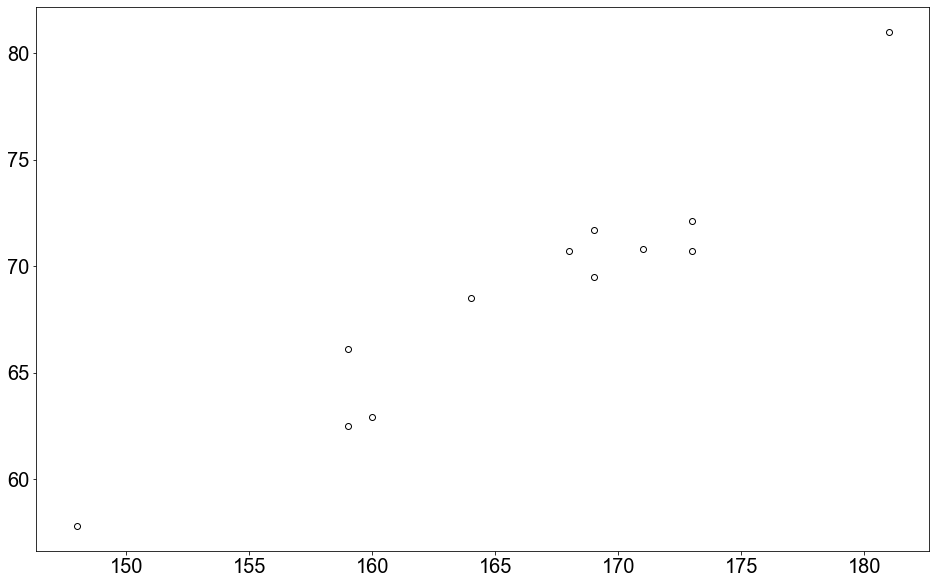

In [39]:
# Erzeuge Streudiagramm
fig = plt.figure()
plt.scatter(data['height'],data['weight'],color = 'white', edgecolor = 'k')
plt.show()

Die visuelle Inspektion bestätigt unsere Vermutung, dass die Beziehung zwischen der Größe und der Gewichtsvariable ungefähr linear ist. Mit anderen Worten: Mit zunehmender Größe neigt der einzelne Student dazu, ein höheres Gewicht zu haben.

### Überprüfung der Hypothesen

Zur Durchführung des **Regressions-$t$-Tests** folgen wir dem schrittweisen Durchführungsverfahren für Hypothesentests. Der **Regressions-$t$-Test** folgt demselben schrittweisen Verfahren wie in den vorangegangenen Abschnitten beschrieben.

$$
\begin{array}{l}
\hline
\ \text{Schritt 1}  & \text{Geben Sie die Nullhypothese } H_0 \text{ und alternative Hypothese } H_A \text{ an.}\\
\ \text{Schritt 2}  & \text{Legen Sie das Signifikanzniveau, } \alpha\text{ fest.} \\
\ \text{Schritt 3}  & \text{Berechnen Sie den Wert der Teststatistik.} \\
\ \text{Schritt 4} &\text{Bestimmen Sie den p-Wert.} \\
\ \text{Schritt 5} & \text{Wenn }p\le \alpha \text{, } H_0 \text{ ablehnen } \text{; ansonsten } H_0 \text{ nicht ablehnen} \text{.} \\
\ \text{Schritt 6} &\text{Interpretieren Sie das Ergebnis des Hypothesentests.} \\
\hline 
\end{array}
$$

**Schritt 1 : Geben Sie die Nullhypothese $H_0$ und alternative Hypothese $H_A$ an**

Die Nullhypothese besagt, dass es keinen linearen Zusammenhang zwischen der Größe und dem Gewicht der Personen im Datensatz der Studierenden gibt.

$$H_0: \beta_1=0\text{ (die Vorhersagevariable ist für die Erstellung von Vorhersagen nicht geeignet)}$$

**Alternative Hypothese**

$$H_A: \beta_1\ne0\text{ (die Vorhersagevariable ist für die Erstellung von Vorhersagen geeignet)}$$

**Schritt 2: Legen Sie das Signifikanzniveau,$\alpha$ fest**

$$\alpha = 0,01$$

In [40]:
alpha = 0.01

**Schritt 3 und 4: Berechnen Sie den Wert der Teststatistik und den $p$-Wert**

Zur Veranschaulichung berechnen wir die Teststatistik manuell in Python. Erinnern Sie sich an die obige Gleichung.

$$t =\frac{\beta_1}{s_b}= \frac{\beta_1}{s_e/\sqrt{\sum(x- \bar x)^2}}$$

wobei $\beta_1 = \frac{cov(x,y)}{var(x)}$, und

$$s_e = \sqrt{\frac{SSE}{n-2}}\text{,}$$

wobei $SSE = \sum_{i=1}^n e_i^2 = \sum_{i=1}^n (y - \hat y)^2$. Die Teststatistik folgt einer $t$-Verteilung mit $df=n-2$. Um $\hat y = \beta_0+\beta_1x$ zu berechnen, müssen wir $\beta_0$ kennen, das als $\beta_0 = \bar y -\beta_1 \bar x$ berechnet wird.

Um nicht durch die verschiedenen Berechnungsschritte verwirrt zu werden, führen wir einen Schritt nach dem anderen durch.

- Erstellen Sie das lineare Modell durch Berechnung des Achsenabschnitts ($β_0$) und des Regressionskoeffizienten ($β_1$).

In [41]:
y_bar = np.mean(data['weight'])
x_bar = np.mean(data['height'])

# Lineares Modell
beta1 = np.cov(data['height'], data['weight']) / np.var(data['height'],ddof = 1)
beta1[0][1]

0.6507615230460922

In [42]:
beta0 = y_bar - beta1[0][1] * x_bar
beta0

-39.44320641282566

Berechnen Sie die Summe der quadrierten Fehler ($SSE$) und den Reststandardfehler ($s_e$).

In [43]:
# Berechne SSE
y_hat = beta0 + beta1[0][1] * data['height']
SSE = sum((data['weight'] - y_hat)**2)
SSE

30.38618436873755

In [44]:
# Berechne Reststandardfehler
se = np.sqrt(SSE/(n-2))
se

1.743163341994592

- Berechnen Sie den Wert der Teststatistik.

In [45]:
# Berechne Teststatistik
tw = beta1[0][1] / (se/np.sqrt(sum((data['height']-x_bar)**2)))
tw

10.766100516207496

Der numerische Wert der Teststatistik ist $\approx 10,7661$.

Um den $p$-Wert zu berechnen, wenden wir die Funktion `t.cdf()` an. Erinnern Sie sich daran, wie man die Freiheitsgrade berechnet.

$$df = n - 2= 10$$

In [46]:
# Berechne p-Wert
df = len(data['height'])-2

# zweiseitiger Test
p_upper = t.sf(abs(tw), df = df)
p_lower = t.cdf(-abs(tw), df = df)
p = p_upper + p_lower
p

8.048424329265031e-07

**Schritt 5: Wenn $p \le \alpha , H_0$ ablehnen; ansonsten $H_0$ nicht ablehnen**

In [47]:
p <= alpha

True

Der $p$-Wert ist kleiner als das angegebene Signifikanzniveau von $0,01$; wir verwerfen $H_0$. Die Testergebnisse sind statistisch signifikant auf dem $1 \%$-Niveau und liefern einen sehr starken Beweis gegen die Nullhypothese.

**Schritt 6: Interpretieren Sie das Ergebnis des Hypothesentests**

$p=8,0484243 \cdot 10^{-7}$. Bei einem Signifikanzniveau von $1 \%$ lassen die Daten den Schluss zu, dass die Variable Größe ein guter Schätzer für das Gewicht der Studenten ist.

### Hypothesentests in Python

Wir haben gerade einen **Regressions-$t$-Test** in Python manuell berechnet. Das ist in Ordnung, aber wir können dasselbe in Python mit nur ein paar Zeilen Code tun!

Daher müssen wir die Funktion `linregress()` auf unsere Antwortvariable `weight` und unsere Vorhersagevariable `height` anwenden.

In [48]:
gradient,  intercept, r_value, p_value, stderr = stats.linregress(data['height'],data['weight'])
print("p-value", p_value)

p-value 8.048424329264974e-07


Für den Vergleich mit den manuell berechneten Werten extrahieren wir den Achsenabschnitt $\beta_0$ und die Steigung $\beta_1$

In [49]:
print('Achsenabschnitt ', intercept)
print('Steigung ',gradient)

Achsenabschnitt  -39.44320641282566
Steigung  0.6507615230460922


Vergleichen Sie die Ausgabe mit unseren Ergebnissen von oben. Sie passen perfekt!